### `1` Define a use case of Deep Learning in your current domain (if fresher, pick any of your favorite) and propose a solution through DL. 


`Domanin`
##### Oracle Database Administartion.

`Use Case`

As an Oracle DBA we have to perform many tasks to keep the database running and ready for all the transactions that are going to be performed on the database(DB).As the DB keeps running lots and lots of lines are generated as logs in the log files and trace files of the database, on event of any incident it gets difficult for a DBA to go through all the lines and troubleshoot the incident and find out what caused the incident. Deep learning can be used to detect anomaly in the log files of the database which then can help in root cause analysis for any incident that can occur in the future.

`Solution`

 To achieve this first and foremost the required thing is data which can be gathered very easily as the DB automatically generates a log file which contains data of each and every event along with the system/DB timestamp. We will have to get a sample of the log file when the database is running in a normal state, so when in the real time the model receives a line in the log file that is different from the usual file it can distinguish between the normal state logs and unknown lines of logs. These lines can be of different nature, such as errors, warning, information which can be further classified using supervised learning once we have prepared the data by manually labelling it for few set of lines and then use a new model to classify these lines which will help us achieve an intelligent dashboard for monitoring the database.


This is a problem that comes under Natural Language Processing in the domain of AI, This can be solved using Deep learning.

Deep learning consists of models that are built using the concepts of Neural networks, LSTM auto-encoder can be used for this task, we will train an auto-encoder with the data collected from the running of database in normal state. By doing this the Auto encoder can reconstruct back a known input sequence. And then when we have a sequence which has anomalies and are fed to the model then the model will try to reconstruct back the input, but the ERROR, in this case, will be high as the data has some features (anomalies) that the model is not trained to handle.

This can be then fed to the dashboard and as well as collected for further processing through manual labelling for future use case of classifying the logs events in different classes such as error, warning, informative


### `2` A steel manufacturing plant is spending many hours in manual inspection of their steel product(flat 2*2 ft steel plates) The inspection is a crucial part of their delivery cycle. 
#### Design and detail out a proposal to automate the process using DL



##### Problem is to classify the steel 2*2 sheet into a defective or a good product that can be delivered to the customer.


**`The Process`** 

[Data Collection] --> [Data Pre processing] --> [Model Building] --> [Model Testing]


*`Data Collection`*

- If the data of the past is available with the client in a database or excel sheets or in any other form than we can directly go to the next steps.
- If the data is not available with the client we will have to setup a process to collect the data through the ongoing maual inspection process and store it in a way so that it is easily accessible and can be processed to train the model
- Data can be stored in a database or in excel sheet manually or through some machine if there are any machine present on the premesis to do the testing of the sheets.

*`Data Pre-Processing`*

- Going through the data and finding trends in it 
- Performing different statistics related operations to gether different insights
- Visualling the data to understand the trends in the data in a more appealing way so that it is presentable to the stackholders.
- Deciding what all parameters are required for the model to make decisions.
- Creating new features that are more descriptive
- Rulling out the fetures that are not necessary

*`Model Building`*

- Based on the data we have , we will decide what kind of neural network can be used.
- Creating different models with different hyperparameters and different hidden layers to see what fits the best.

*`Model Testing`*

- We will check the performance of the model in real time along with the manual inspection of the sheets
- Gathering results from model based on the accuracy of the model 
- If the model is not performing well all the steps will be iterated again to find any missing part in the data/model.

Finally when we have achieved a model with desired capability the model can be deployed according to the criteria of the customer. 
It can be a Web app which recieves different parameters as input and give an output for the same,
if computer vision is involved we can dirrectly feed the image using a simple script to the model and display it on a webpage or by other means as specified by the client. 

####  Please, explain what will be your major questions to client regarding the process & data

- Q1) What is the process of inspection?
- Q2) Only if the apperance of the sheets are used to decide the quality of the sheet, if not what all other features are being used?
- Q3) Have these data been recorded from the past somewhere?  How the data is stored?
- Q4) Are there machines for testing some features of the sheet?
- Q5) On what basis are the sheets being rejected?
- Q6) How do you want the final deployment of the model to be?
- Q7) Is the model just required to classify the sheets into good or bad? If no what is the desired output?


### `3` A particular linear process has an input (x=5) and output (y=10)
* Create a model using numpy to solve for “y” and record your best error.
* Repeat the above experiment with different hyper parameters like Learning Rate & activation function.
* Record the various hyperparameters used in experiment and submit the table with data (x | y | y_pred | error (RMSE) | LR | activation used).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([5])
y = np.array([10])
#normal linear problem is y = X*W + b

# function to solve the linear problem
def predict(W,b):
    pred = X*W + b
    return pred


def error(pred):
    RMSE = (y - pred)**2
    return RMSE.sum()


def Weight_update(pred,learning_rate,W,b):
    diff_of_error_wrt_W = -2 * (y - pred) * X
    diff_of_error_wrt_b = -2 * (y - pred)
    W -= diff_of_error_wrt_W * learning_rate
    b -= diff_of_error_wrt_b * learning_rate
    return W,b


def Weight_update_without_LR(pred,W,b):
    diff_of_error_wrt_W = -2 * (y - pred) * X
    diff_of_error_wrt_b = -2 * (y - pred)
    W -= diff_of_error_wrt_W 
    b -= diff_of_error_wrt_b 
    return W,b

def plot(error,act,lr,pred):
    fig = plt.subplots(1,2,figsize = (12,5))
    plt.subplot(1,2,1)
    plt.plot(error,color = 'black')
    plt.title(f'Error with Activation {act} and LR {lr}')
    plt.xlabel('epcohs')
    plt.ylabel('error')

    plt.subplot(1,2,2)
    plt.plot(pred,color = 'lightgreen')
    plt.title(f'Predictions with Activation {act} and LR {lr}')
    plt.xlabel('epcohs')
    plt.ylabel('pred')
    plt.show()

def linear_model(epochs,learning_rate ="None",activation='None',verbose = 0):
    results = pd.DataFrame()
    error_rmse,predictions = [],[]
    W,b = np.random.randn(1),np.random.randn(1)
    for epoch in range(0,epochs):

        # Making Prediction

        pred = predict(W,b)

        # Settings for Activation

        if activation == 'None':
            pass
        elif activation == 'tanh':
            pred = tanh(pred)
        elif activation == 'relu' :
            pred = relu(pred)
        elif activation == 'sigmoid' :
            pred = sigmoid(pred)
        
        # Calculating Error

        RMSE = error(pred)
        error_rmse.append(RMSE)
        predictions.append(pred)
        # Settings for Verbose

        if verbose == 0:
            pass
        else:
            print("epoch : ",epoch+1,"Error ",RMSE)
        
        # Settings for Learning Rate

        if learning_rate == 'None':
            W,b = Weight_update_without_LR(pred,W,b)
        else:
            W,b = Weight_update(pred,learning_rate,W,b)

    #plotting the error
    plot(error_rmse,activation,learning_rate,predictions)
    
    return error_rmse,predictions


for linear_model to run we need to run cell of Ans 7 for activation functions

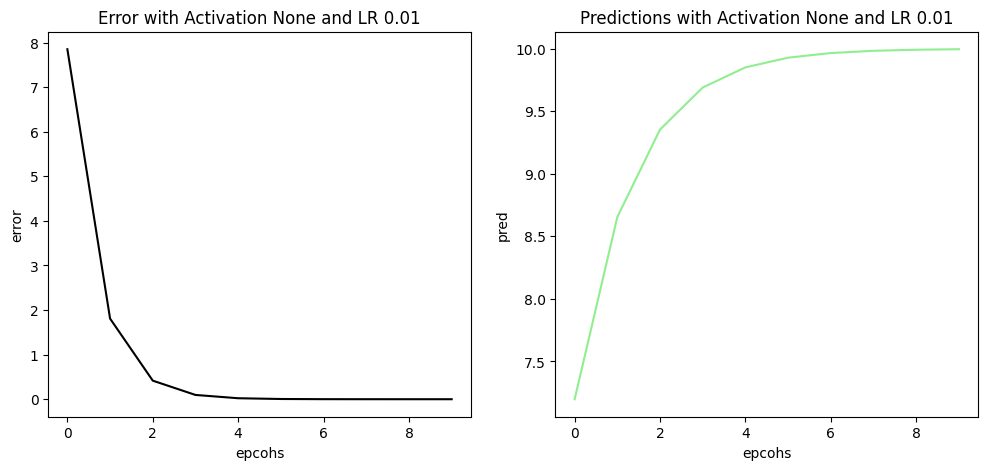

Best Error :  0.0


array([9.99621039])

In [6]:
e,pred = linear_model(10,learning_rate=0.01)
e = np.array(e)
print("Best Error : ",round(e.min(),4))
pred[-1]

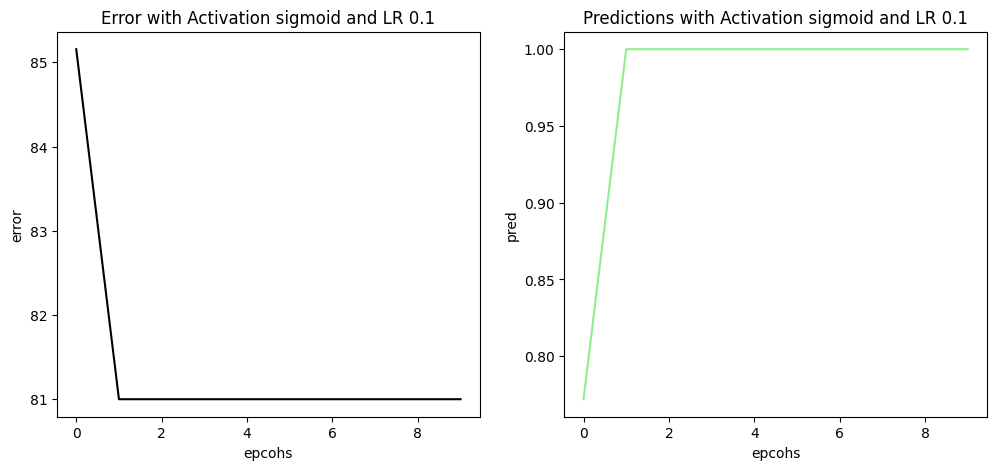

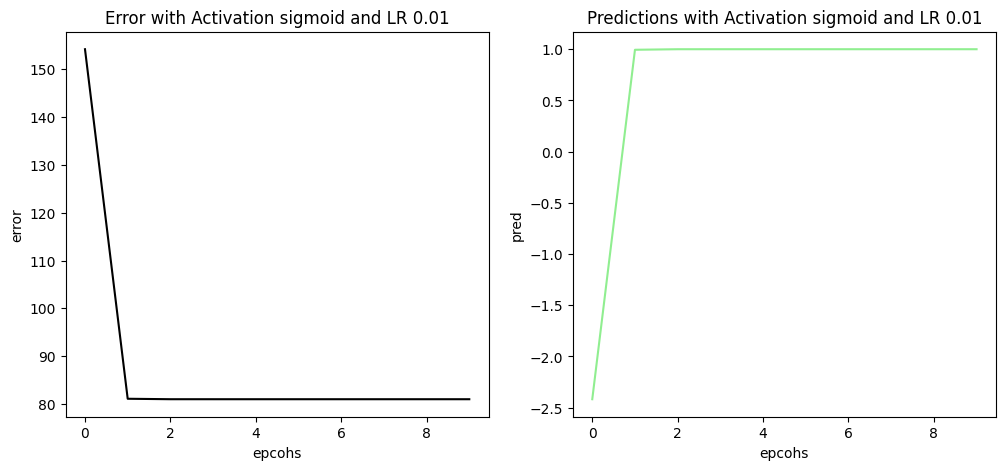

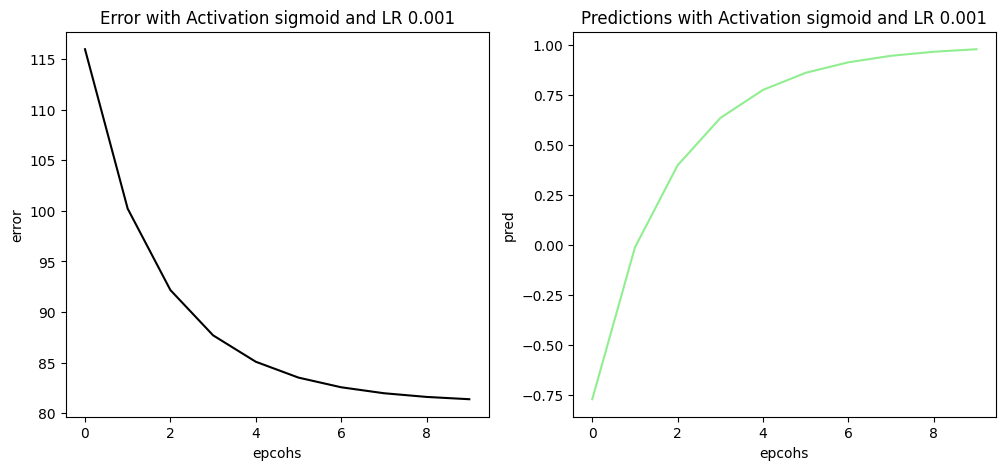

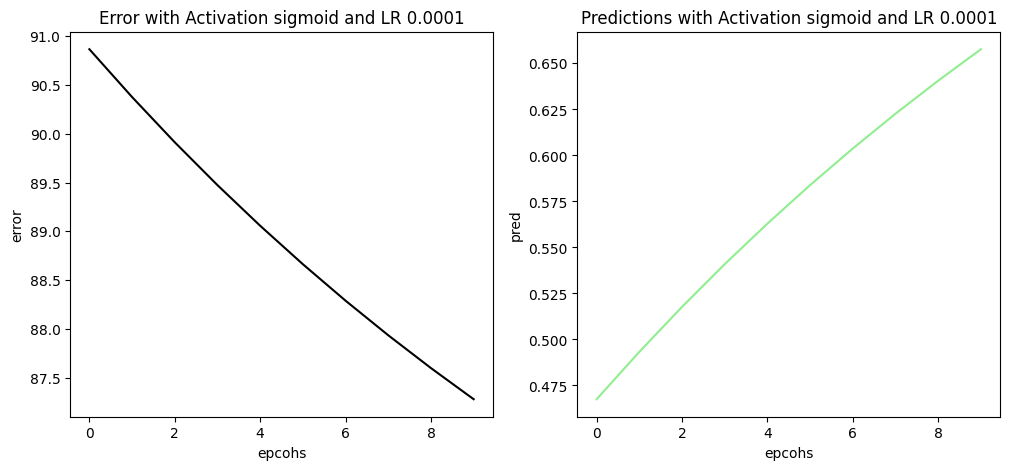

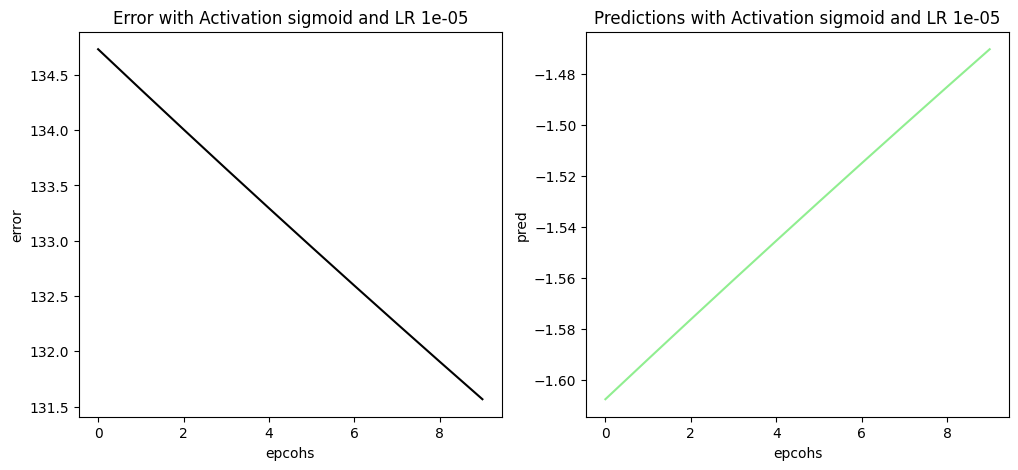

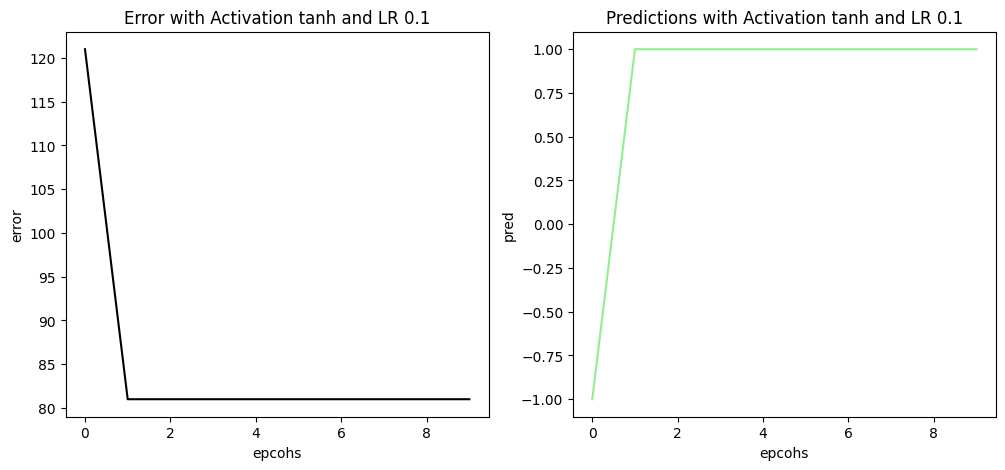

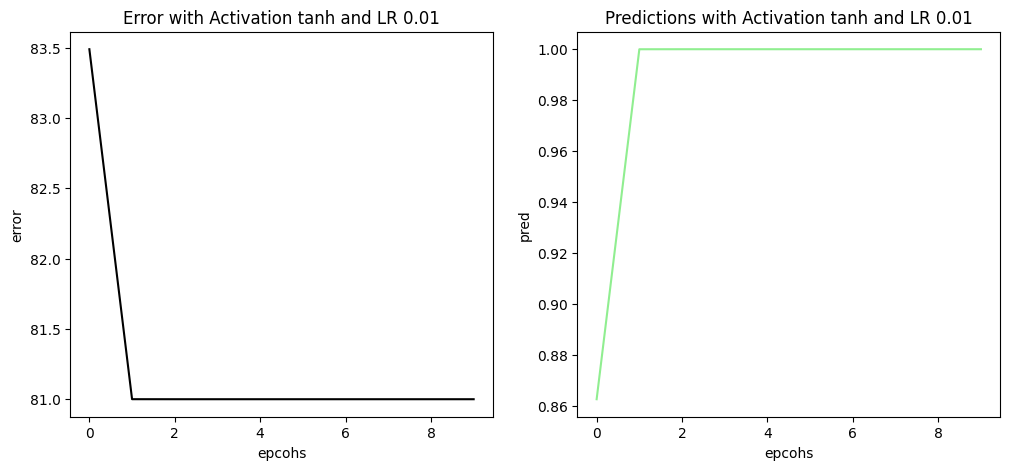

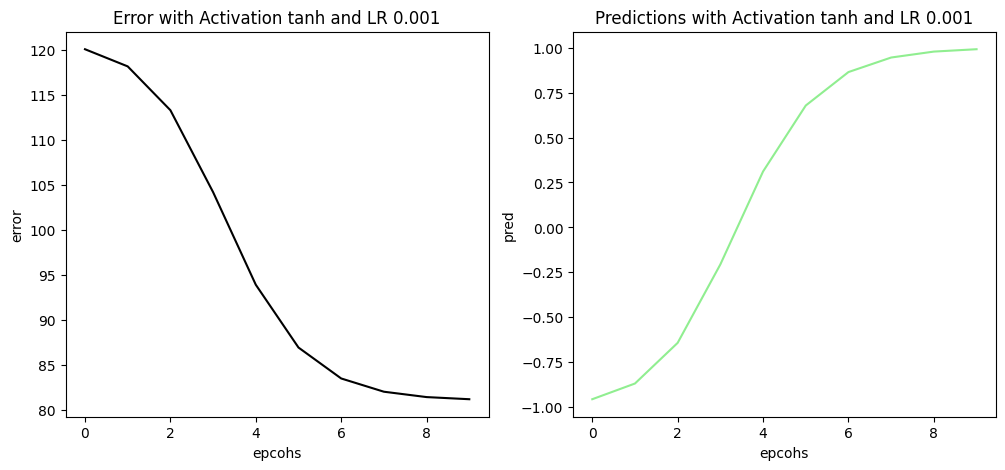

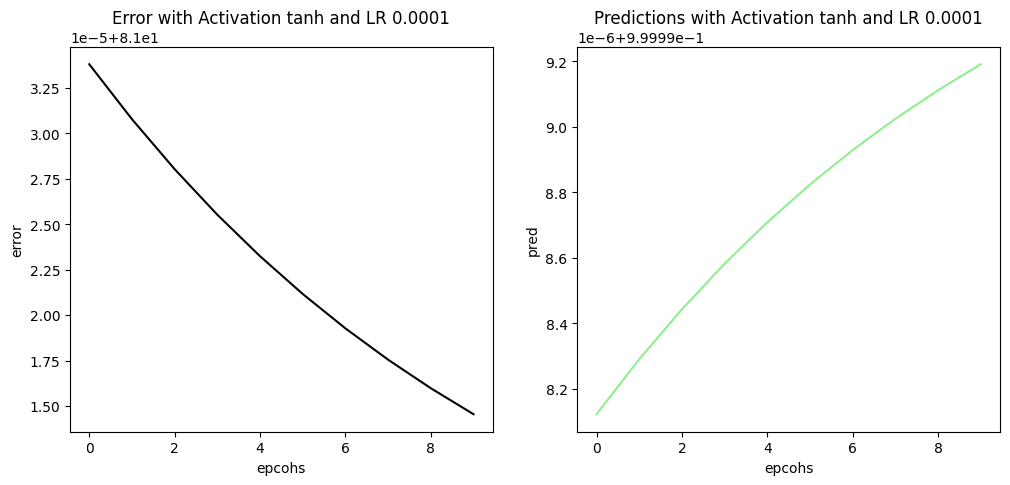

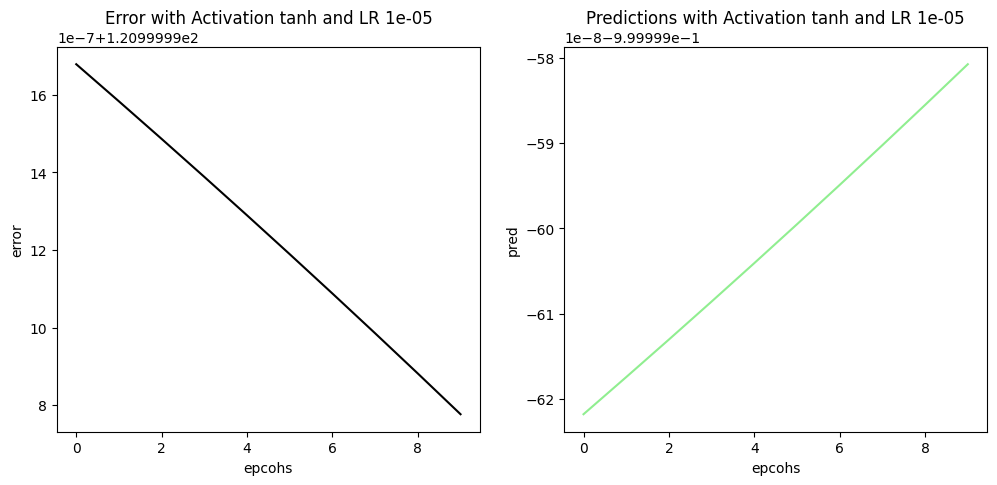

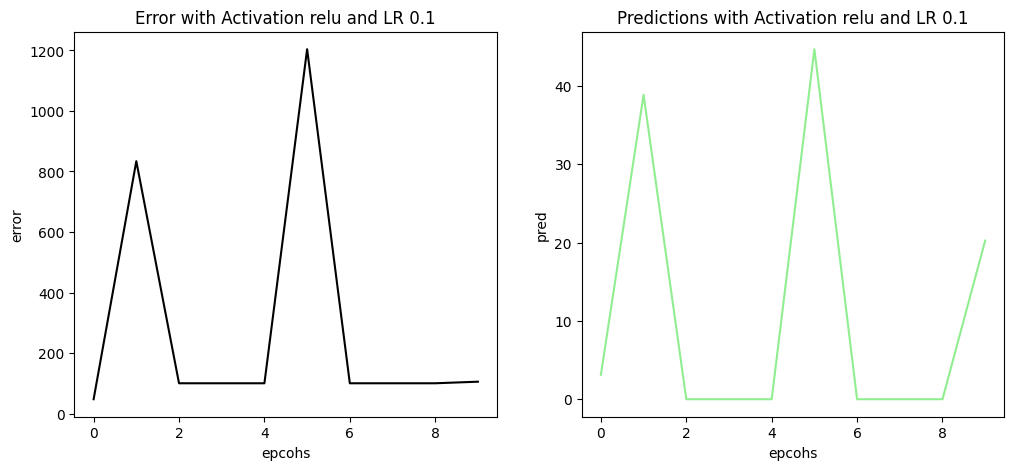

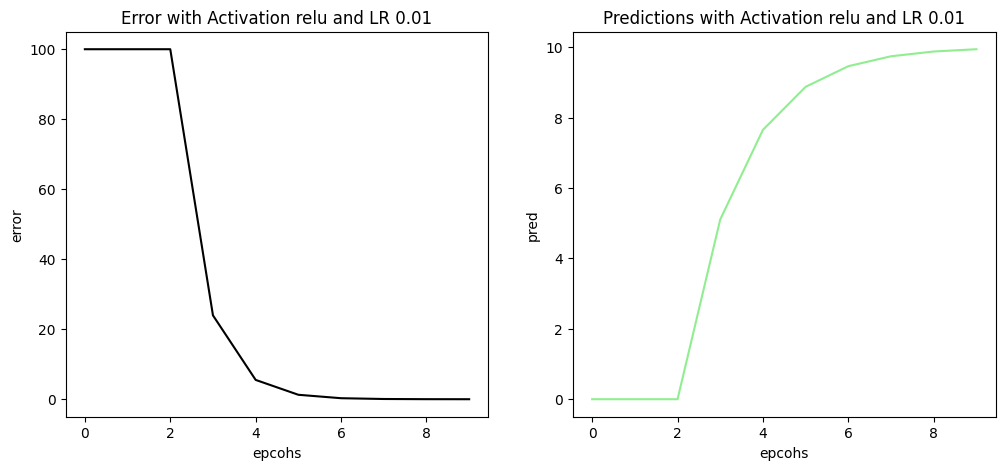

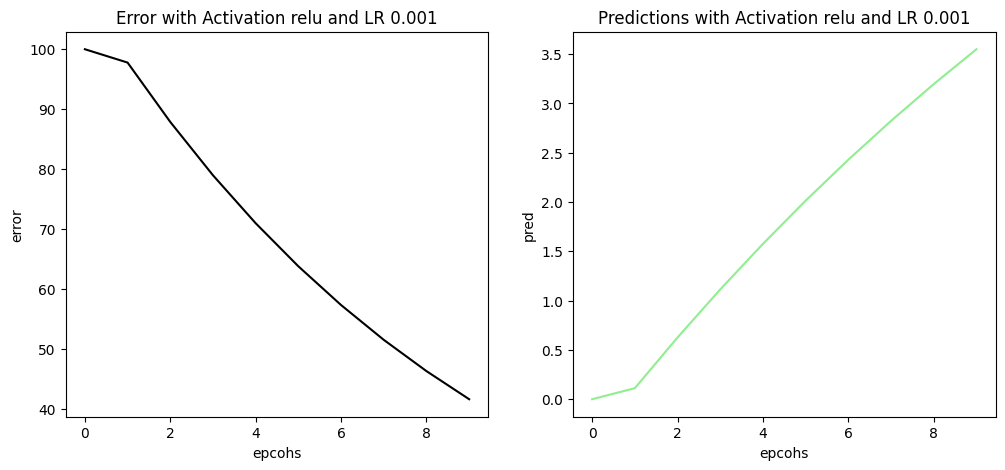

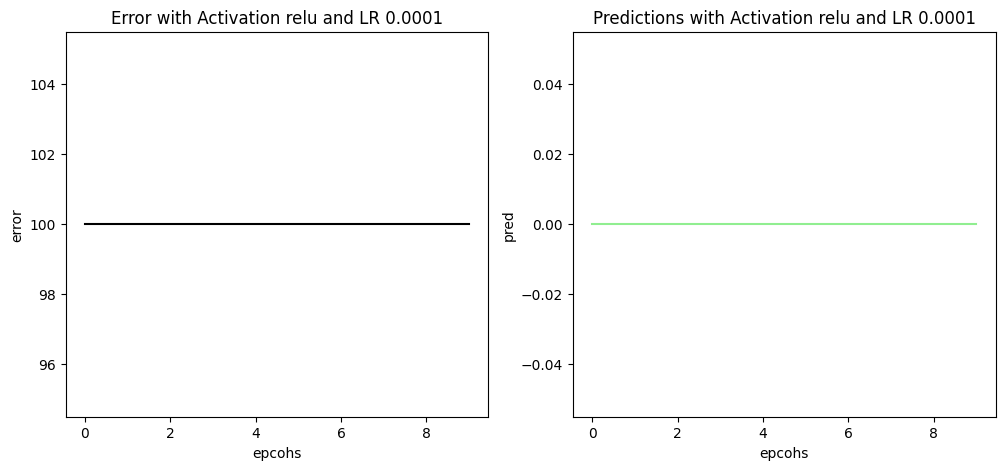

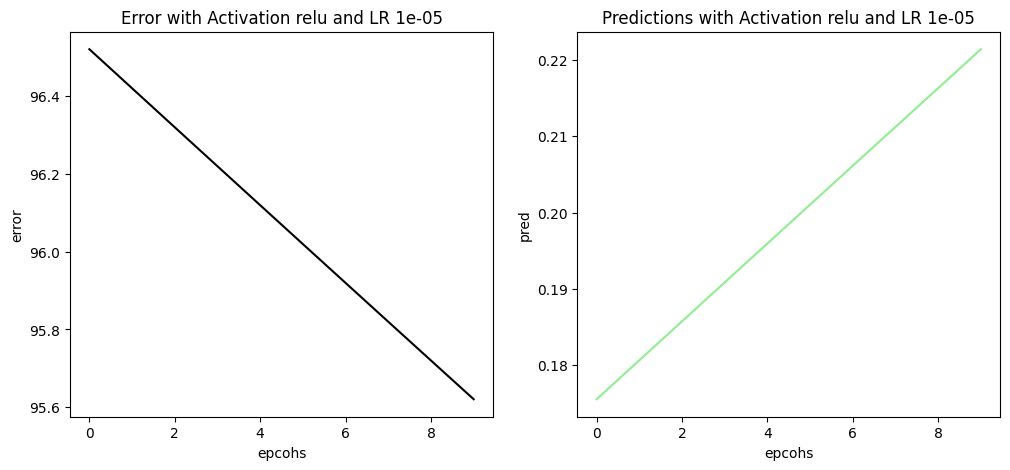

,X,y,y_pred,RMSE,Learning_Rate,Activation
0,5,10,[0.7719946428333907],81.000000,0.10000,sigmoid
0,5,10,[-2.41795782804564],81.000000,0.01000,sigmoid
0,5,10,[-0.7694091917880848],81.378156,0.00100,sigmoid
0,5,10,[0.46752563589117],87.278701,0.00010,sigmoid
0,5,10,[-1.6074062757667922],131.566788,0.00001,sigmoid
0,5,10,[-0.9999663121620876],81.000000,0.10000,tanh
0,5,10,[0.8627322597083543],81.000000,0.01000,tanh
0,5,10,[-0.9559789527058833],81.153908,0.00100,tanh
0,5,10,[0.9999981222726927],81.000015,0.00010,tanh
0,5,10,[-0.9999996217704292],120.999991,0.00001,tanh


In [7]:
import time
column=['X','y','y_pred','RMSE','Learning_Rate','Activation']
table = pd.DataFrame(columns=column)


learning_rate = [0.1,0.01,0.001,0.0001,0.00001]
activation = ['sigmoid','tanh','relu']

for activations in activation:
    for lr in learning_rate:
        e,pred = linear_model(learning_rate=lr,activation=activations,epochs=10)
        table = pd.concat([table,pd.DataFrame([[X[0],y[0],pred[0],e[9],lr,activations]],columns=column)])
        

table     

### `4` Define the role of Learning Rate in Neural Networks and why they are important using an experiment?


The Learning rate is a configurable hyper-parameter used to govern the pace at which the algorithm learns or update the value of its parameter estimates. It controls how much to change the model in response to the estimated error each time the model weights are updated. Learning rate is small positive value usually between the range 0.0 and 1. If the value of learning rate is too small it may result in a long training process that could get stuck, while on the other hand a value too large may result in a suboptimal sets of weights too fast or a very unstable learning process.



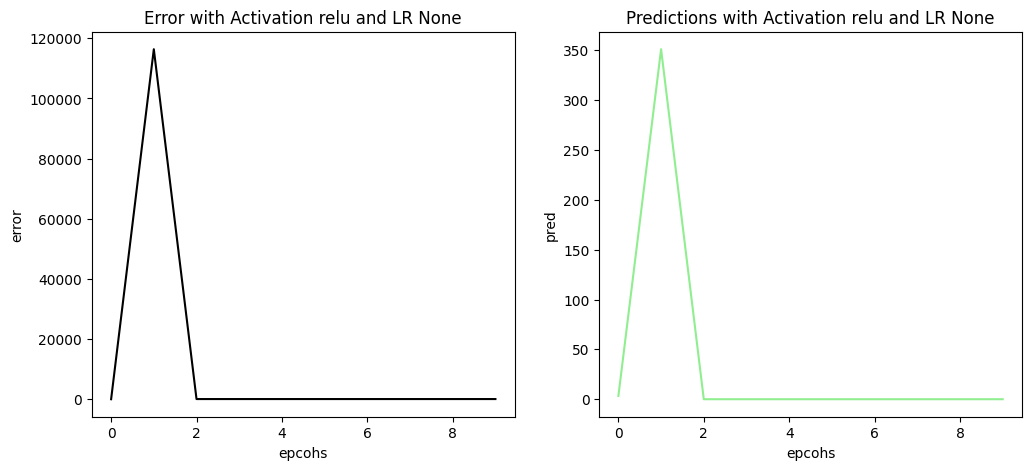

[array([3.31103422]), array([351.13725501]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0])]


In [8]:
e,pred = linear_model(epochs=10,activation="relu",verbose=0)
print(pred)

The model is not able to learn for the inputs and outputs without the learning rate and is unable to solve for y

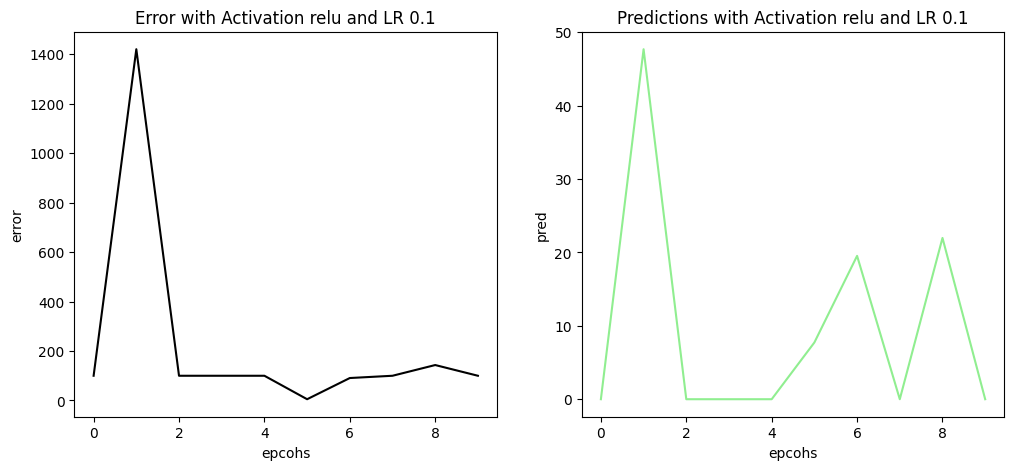

In [9]:
e,pred = linear_model(learning_rate=0.1,activation="relu",epochs=10,verbose =0)


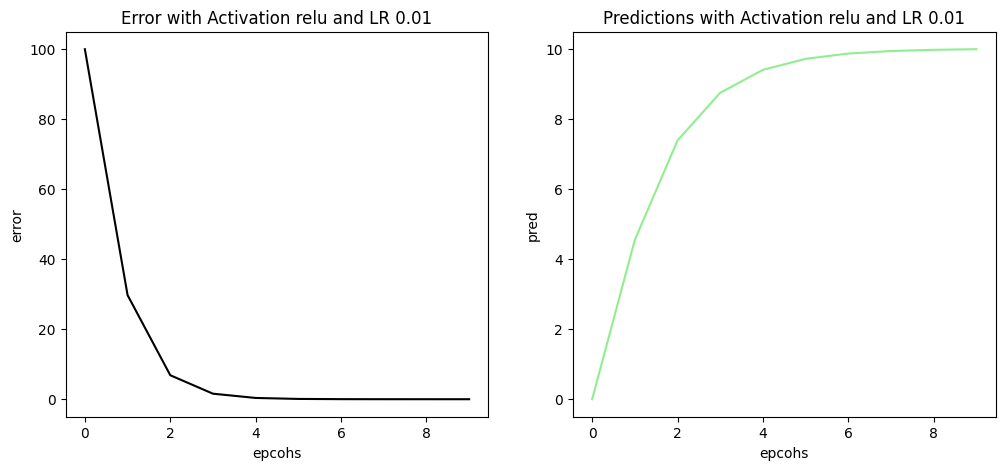

In [10]:
e,pred = linear_model(learning_rate=0.01,activation="relu",epochs=10,verbose = 0)

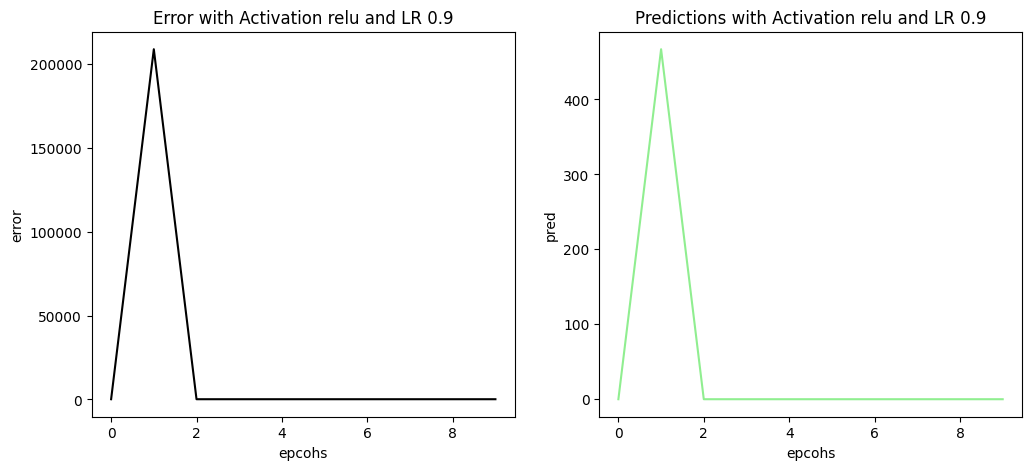

[array([0]), array([467.07238461]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0])]


In [11]:
e,pred = linear_model(learning_rate=0.9,activation="relu",epochs=10,verbose =0)
print(pred)

From the above experiments we can state the following
* A very high learning rate can stop the model from converging.
* A very small learning rate may cause the model to learn very slowly and hence the number of epochs might increase for the model to reach to the optimal solution for the problem.
* For the above model 0.01 is the perfect learning rate where the model can learn the best relation between X and y without needing to run more than 10 epochs


### `5` Explain the 3 step life cycle of Deep Learning projects with an example use case.

The DL project life cycle can generally be divided into three main stages: data preparation, model creation, and deployment. 

![Alt text](https://deepchecks.com/wp-content/uploads/2021/06/post-1017-2.png )

Before this cyclic process begins there should be a problem that is required to be solved, so we can for the sake of example state our very own problem satement:

`Problem Statement`

Creating a stock prediction model for Google Stcoks

`Data Preparation`

Machine Learning/Deep Learning projects require lots and lots of data to train a model that can predict/classify/forecast the outputs. This Data Preparation stage contains following stages:

* Data Collection
* Understanding the Data/ EDA
* Data Cleaning
* Feature Engineering

The requirments of this steps for different projects may differ, We can gather data using API's, web scrapping or through database any medium that is available.

We can perform some simple stats functions on the data to understand it distribution, centroids etc.

Further Null values, Outliers are needed to be treated if present.

For our Problem, We can either scrap any financial website or get the data from Yahoo finance in a csv format, and keep the information that is required for solving the problem.

`Model Building`

Next we need to decide the type of model that should be used for the predictions to make , as we are going to predict the stock market price of google which is a time series data we need to use RNN based model. Furhter we need to train the model and check the performance of it using iterative steps of tuning hperparamters, neural nodes and layers. Once we have found the optimal model we can move onto next step.

`Model Deployment`

Once we have the desired model we need it to predict for realtime for which we can create a model file and use it to passthrough API so that any application can use it or we can directly deploy it on a web app using python package flask.

### `6` Mathematically, derive the complete process of a single perceptron from an input to output and perform the below task:
* Explain the above in 3 phases of Feed Forward, Error Calculation, Back Propagation mathematically.
* Explain the role and importance of each and every parameter other than x and y.


Single Perceptron model is single nuron model that solves for a bsic linear problem X*W + b = y, where X is the input and y is the output, W is the weight and b is the bias.
As the number of inputs increases the number of weights increases associated with the inputs, This weights are initialized randomly and are added to the inputs , for example:

In [12]:
X1 = np.array([1,2])
X2 = np.array([2,4])
y = np.array([4,10])

W1 = 1.5
W2 = 4
b = 3

Here the X1,X2 are inputs and y is the output, so single perceptron will predict the y using the randomly initialized weights and bias using the basic linear maths as follows.

In [13]:
Pred = X1*W1 + X2*W2 + b
print(Pred)

[12.5 22. ]


The above stated process is said to be the Feed Forward phase of the single perceptron.

Now we need to calculate the error of the prediction, which can be done using the mean squared error method for which the difference of the outputs are summed and squared. This is known as the error calculation phase.

In [14]:
Error = ((Pred - y).sum())**2
print(Error)

420.25


The Error from the randomly initilized model is very high so now we need to back propagate and find a much better weights so that the error can be reduced, for this the error is differentiated againt the weights and the bias.

Error = ((Pred - y).sum())**2 = ((Pred[0] - y[0]) + (Pred[1] - y[1]))**2 = ((X1[0]W1 + X2[0]W2 + b) + (X1[1]W1 + X2[1]W2 + b))**2

diff_error/diff_W1 = 2 * (X1W1 + X2W2 + b -y) * X1 = 2 * (Pred - y) * X1 for every feature in X1

diff_error/diff_W2 = 2 * (X1W1 + X2W2 + b -y) * X2 = 2 * (Pred - y) * X2 for every feature in X2

diff_error/diff_b = 2 * (Pred - y)

W1new = W1 - diff_error/diff_W1 * LR

W2new = W2 - diff_error/diff_W2 * LR

bnew = b - diff_error/diff_b



In [15]:
for i in range(0,X1.shape[0]):
    dE_dW1 = 2 * (Pred[i] - y[i]) * X1[i] 
    dE_dW2 = 2 * (Pred[i] - y[i]) * X2[i]
    dE_db = 2 * (Pred[i] - y[i])

    W1 -= dE_dW1 * 0.01
    W2 -= dE_dW2 * 0.01
    b -= dE_db * 0.01

print(W1,W2)
Pred = X1*W1 + X2*W2 + b
Error = ((Pred - y).sum())**2
print(Pred,Error)



0.8500000000000001 2.7
[ 8.84 15.09] 98.6049


The above method is know as back propagation.

Weights and bias are the two additional parameters other than X and y.

Weights indicates the relative importance of the input features, Bias is added to the sum of the weighted inputs. Bias makes adjustments within the neuron


### `7` What are activation functions and why are they required in NN?
* Create python functions for sigmoid, tanh, relu & softmax. 


`Activation Function`

Activation Function helps the neural network to use important information while suppressing irrelevant data points. Activation functions add non-linearity to the neural network, without a activation function any number of hidden layers or nodes will always be solving a linear function and will not be able to establish a non linear relation between the Inputs and Outputs.


In [56]:
def sigmoid(output):
    result = 1 / (1 + np.exp(-output))
    return np.array(result).flatten()

def tanh(output):
    exp = np.e
    result = (exp ** output - exp ** -output) / (exp ** output + exp ** -output)
    return np.array(result).flatten()

def relu(output):
    result=[]
    for item in output:
        result.append(max(item,0))
    return np.array(result).flatten()

def softmax(output):
    result = []
    exp=np.e
    for items in output:
        result.append(np.exp(items)/np.exp(output).sum())
    return np.array(result).flatten()


tes = np.array([10])
sig_out = sigmoid(tes)
tan_out = tanh(tes)
rel_out = relu(tes)
sof_out = softmax(tes)

print("Sigmoid function :" ,sig_out)
print("Tanh function :" ,tan_out)
print("Relu function :" ,rel_out)
print("Softmax function :" ,sof_out)

Sigmoid function : [0.9999546]
Tanh function : [1.]
Relu function : [10]
Softmax function : [1.]


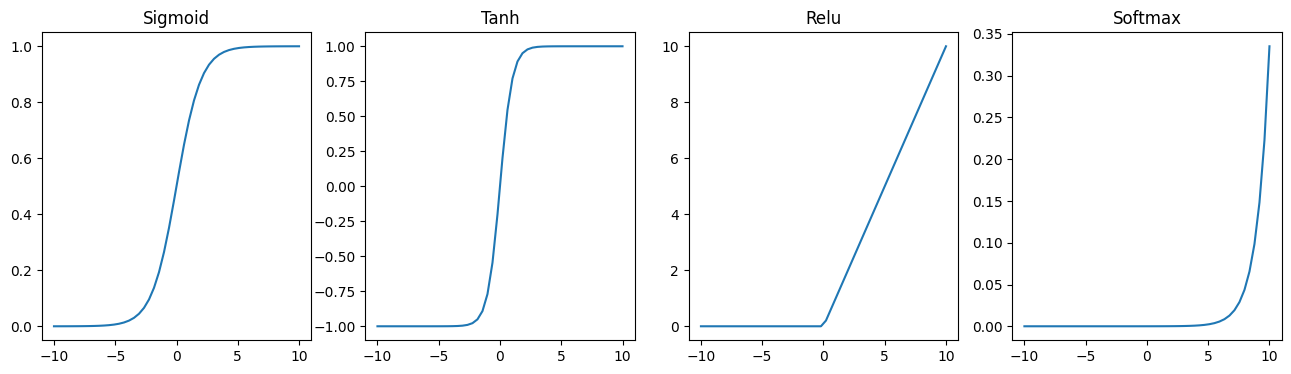

In [68]:
tes = np.linspace(-10,10)
plt.subplots(1,4,figsize = (16,4))
plt.subplot(1,4,1)
plt.title('Sigmoid')
plt.plot(tes,sigmoid(tes))
plt.subplot(1,4,2)
plt.title('Tanh')
plt.plot(tes,tanh(tes))
plt.subplot(1,4,3)
plt.title('Relu')
plt.plot(tes,relu(tes))
plt.subplot(1,4,4)
plt.title('Softmax')
plt.plot(tes,softmax(tes))

plt.show()